# GROUP ASSIGNMENT - RMBA-2771 Fall 2025

1. Executive Summary

2. Introduction

Potential Research Question 1: How does managerial tenure moderate the relationship between job satisfaction and voluntary employee attrition?

Hypotheses H1: Higher job satisfaction is associated with lower attrition risk. 
H2: Longer managerial tenure (years with current manager) is associated with lower attrition risk. 

H3: Managerial tenure moderates the job satisfaction–attrition link such that the protective effect of job satisfaction is stronger when managerial tenure is longer.

Potential Research Question 2: 
Does promotion stagnation (years since last promotion) increase attrition, and is this effect buffered by participation in internal training programs?

H1: More years since last promotion are associated with higher attrition risk. 
H2: Greater participation in training sessions is associated with lower attrition risk. 
H3: Training participation moderates the promotion‐stagnation–attrition link such that the positive effect of promotion stagnation on attrition is weaker for employees with high training engagement.

Research Question 3: 
Does business travel intensity exacerbate the impact of poor work–life balance on voluntary attrition?

H1: Higher business travel frequency is associated with higher attrition risk. 
H2: Lower work–life balance ratings are associated with higher attrition risk. 
H3: Business travel frequency moderates the work–life–balance–attrition link such that the negative effect of poor work–life balance on attrition is stronger among employees with high travel intensity.

Research Question 
Does Business travel intensity affect the risk of attrition 

3. Method 1 

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

hr_df= pd.read_csv("HR-Employee-Attrition copy.csv", encoding="latin1")
hr_df = hr_df.rename(columns={'ï»¿Age': 'Age'})
pd.set_option('display.max_columns', None)
hr_df.head(10)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,4,Male,79,3,1,Laboratory Technician,4,Single,3068,11864,0,Y,No,13,3,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,3,Female,81,4,1,Laboratory Technician,1,Married,2670,9964,4,Y,Yes,20,4,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,4,Male,67,3,1,Laboratory Technician,3,Divorced,2693,13335,1,Y,No,22,4,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,4,Male,44,2,3,Manufacturing Director,3,Single,9526,8787,0,Y,No,21,4,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,3,Male,94,3,2,Healthcare Representative,3,Married,5237,16577,6,Y,No,13,3,2,80,2,17,3,2,7,7,7,7


In [17]:
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [11]:
# Detect outliers using the IQR method for numerical columns
numeric_cols = hr_df.select_dtypes(include='number').columns
outlier_summary = {}

for col in numeric_cols:
    Q1 = hr_df[col].quantile(0.25)
    Q3 = hr_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = hr_df[(hr_df[col] < lower_bound) | (hr_df[col] > upper_bound)]
    outlier_summary[col] = outliers.shape[0]

print("Outlier counts per column:")
print(outlier_summary)

# Check for irregularities in categorical columns
categorical_cols = hr_df.select_dtypes(include='object').columns
for col in categorical_cols:
    print(f"\nUnique values in '{col}':")
    print(hr_df[col].value_counts(dropna=False))

Outlier counts per column:
{'Age': 0, 'DailyRate': 0, 'DistanceFromHome': 0, 'Education': 0, 'EmployeeCount': 0, 'EmployeeNumber': 0, 'EnvironmentSatisfaction': 0, 'HourlyRate': 0, 'JobInvolvement': 0, 'JobLevel': 0, 'JobSatisfaction': 0, 'MonthlyIncome': 114, 'MonthlyRate': 0, 'NumCompaniesWorked': 52, 'PercentSalaryHike': 0, 'PerformanceRating': 226, 'RelationshipSatisfaction': 0, 'StandardHours': 0, 'StockOptionLevel': 85, 'TotalWorkingYears': 63, 'TrainingTimesLastYear': 238, 'WorkLifeBalance': 0, 'YearsAtCompany': 104, 'YearsInCurrentRole': 21, 'YearsSinceLastPromotion': 107, 'YearsWithCurrManager': 14}

Unique values in 'Attrition':
Attrition
No     1233
Yes     237
Name: count, dtype: int64

Unique values in 'BusinessTravel':
BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64

Unique values in 'Department':
Department
Research & Development    961
Sales                     446
Human Resources            63
Name:

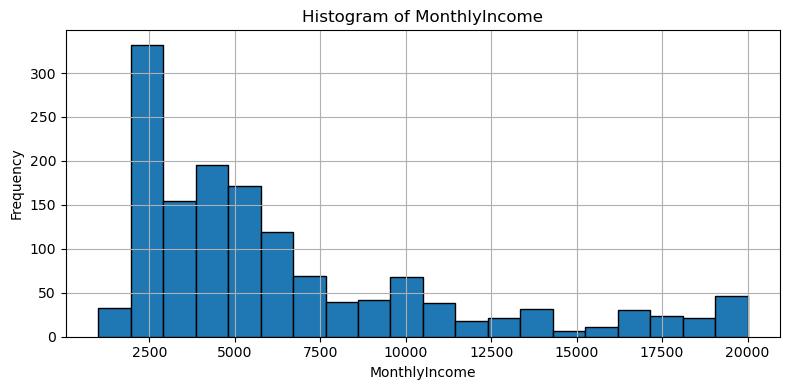

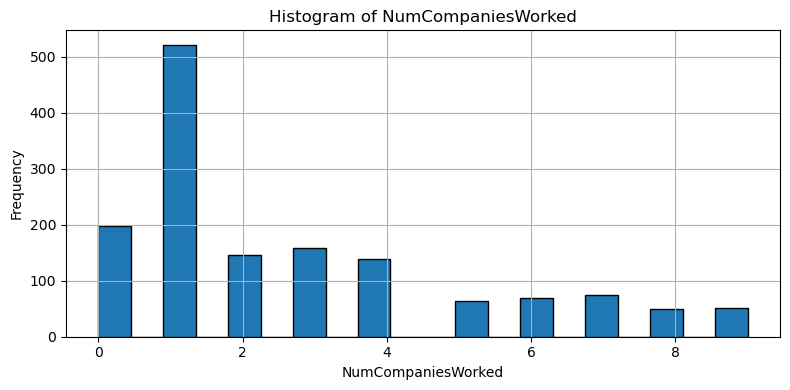

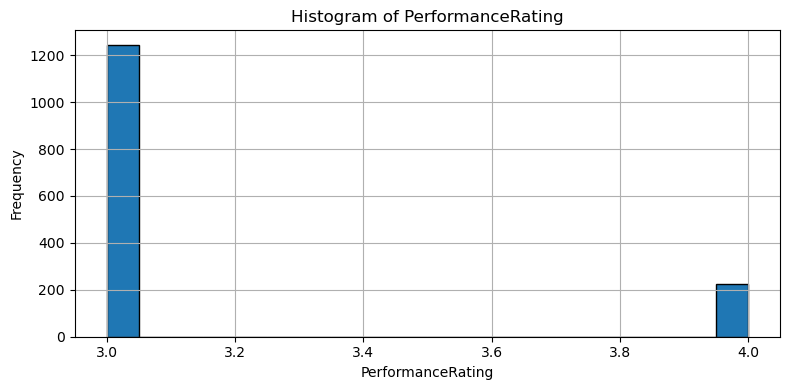

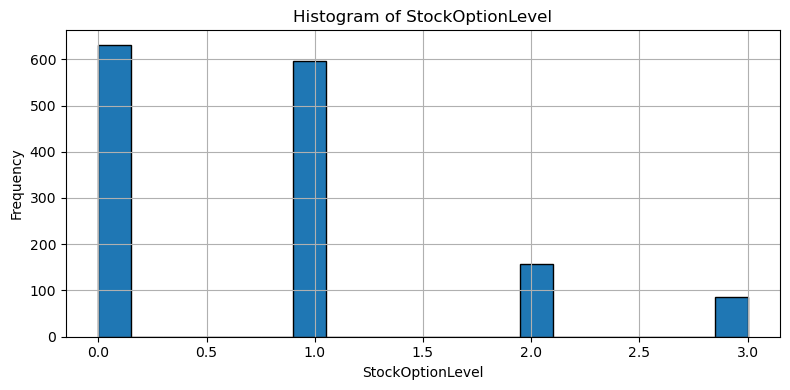

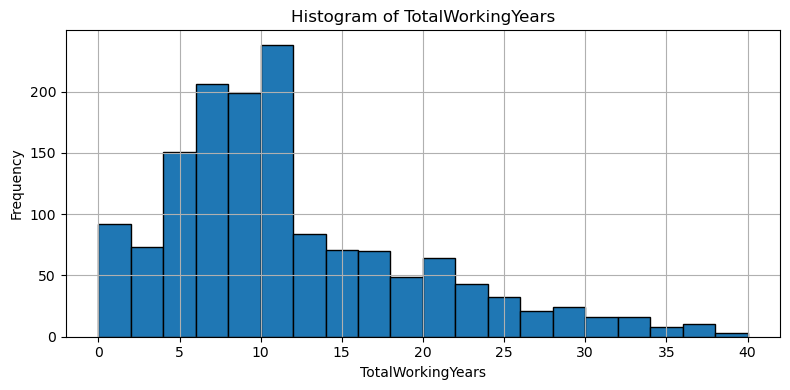

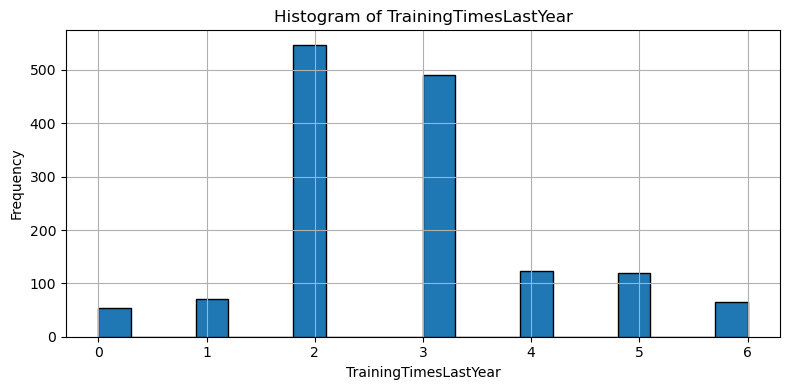

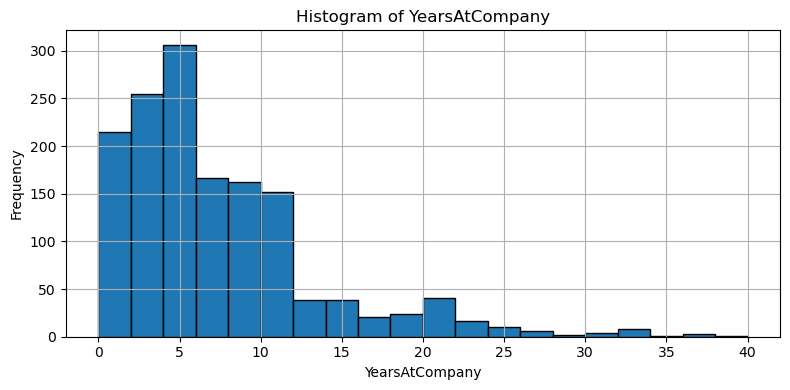

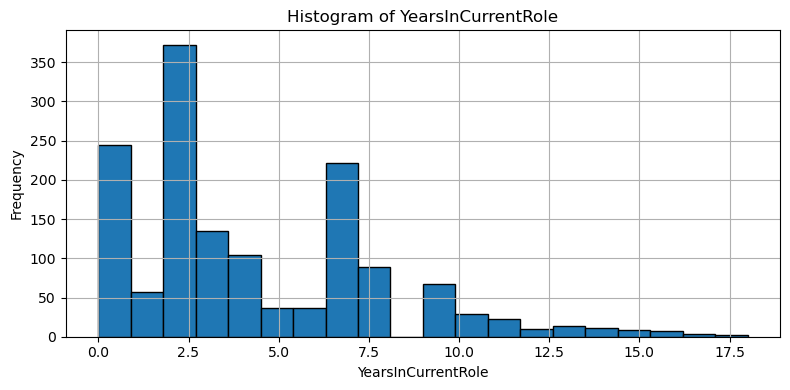

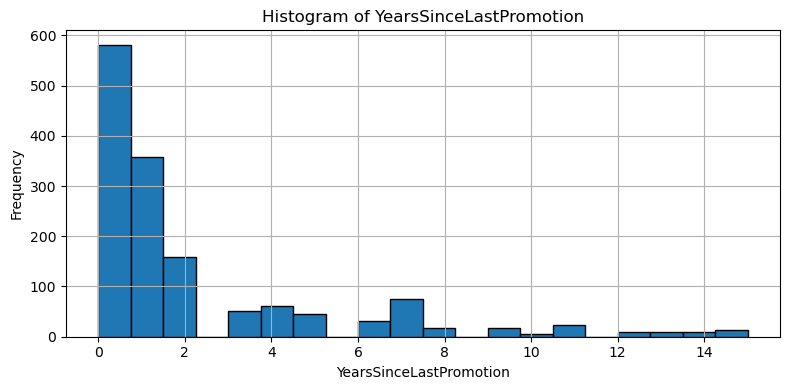

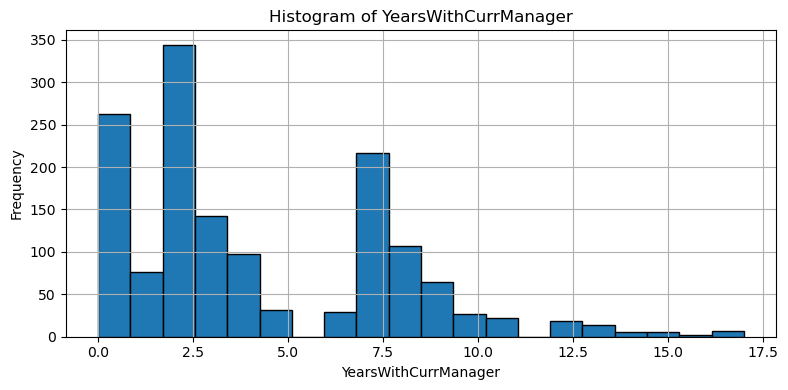

In [36]:
columns_with_outliers = [col for col, count in outlier_summary.items() if count > 0]

# Plot histograms
for col in columns_with_outliers:
    plt.figure(figsize=(8, 4))
    plt.hist(hr_df[col].dropna(), bins=20, edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    

PerformanceRating
3    1244
4     226
Name: count, dtype: int64


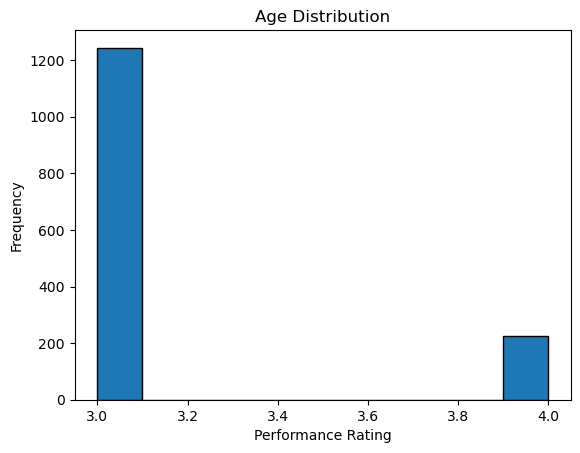

In [32]:
plt.hist(hr_df['PerformanceRating'], bins=10, edgecolor='black')  # Adjust 'age' to your column name

# Add labels and title
plt.xlabel('Performance Rating')
plt.ylabel('Frequency')
plt.title('Age Distribution')

rating_counts = hr_df['PerformanceRating'].value_counts()

# Display the result
print(hr_df['PerformanceRating'].value_counts().sort_index())

4. Method 2 

In [1]:
print("hello")

hello


5. Reflection on the use of AI

6. Conclusion

7. References
